In [1]:
from sklearn.preprocessing import MinMaxScaler      # 最大最小归一化

In [2]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]       # 实验数据

In [3]:
import pandas as pd
pd.DataFrame(data)          # 转成pandas表格数据

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [4]:
#实现归一化
scaler = MinMaxScaler()                             # 实例化
scaler = scaler.fit(data)                           # fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data)                     # 通过接口导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
result_ = scaler.fit_transform(data)                #训练和导出结果一步达成
scaler.inverse_transform(result)                    #将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [6]:
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5,10])         #依然实例化
result = scaler.fit_transform(data)                 #fit_transform一步导出结果
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [9]:
#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了，计算困难
#此时使用partial_fit作为训练接口
scaler = scaler.partial_fit(data)
scaler.fit_transform(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [10]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
 
#归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [11]:
#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [12]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
 
scaler = StandardScaler()                           #实例化
scaler.fit(data)                                    #fit，本质是生成均值和方差

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaler.mean_                                        #查看均值的属性mean_

array([-0.125,  9.   ])

In [14]:
scaler.var_                                         #查看方差的属性var_

array([ 0.546875, 35.      ])

In [15]:
x_std = scaler.transform(data)                      #通过接口导出结果

In [17]:
x_std.mean()                                        #导出的结果是一个数组，用mean()查看均值

0.0

In [18]:
x_std.std()                                         #用std()查看方差

1.0

In [19]:
scaler.fit_transform(data)                          #使用fit_transform(data)一步达成结果 
scaler.inverse_transform(x_std)                     #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [20]:
import pandas as pd
data = pd.read_csv(r"./Narrativedata.csv"
                   ,index_col=0
                  )#index_col=0将第0列作为索引，不写则认为第0列为特征
 
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [22]:
data.info()       # 查看数据的信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [23]:
#填补年龄
 
Age = data.loc[:,"Age"].values.reshape(-1,1)            #sklearn当中特征矩阵必须是二维
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [24]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()                              #实例化，默认均值填补
imp_median = SimpleImputer(strategy="median")           #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补
 
imp_mean = imp_mean.fit_transform(Age)                  #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

In [25]:
imp_mean[:20]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765]])

In [26]:
imp_median[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [28.],
       [31.],
       [28.]])

In [27]:
imp_0[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [ 0.],
       [31.],
       [ 0.]])

In [28]:
#在这里使用中位数填补Age
data.loc[:,"Age"] = imp_median

In [29]:
data.info()           # 查看填补完后的信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [30]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [32]:
import pandas as pd
data_ = pd.read_csv(r"./Narrativedata.csv"
                   ,index_col=0
                  )#index_col=0将第0列作为索引，不写则认为第0列为特征

In [33]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [34]:
data_.loc[:,"Age"] = data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补

In [35]:
data_.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False
# _data_ = data_.drop(axis=0,inplace=False)

In [36]:
from sklearn.preprocessing import LabelEncoder
 
y = data_.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果

In [37]:
le.classes_                                 #属性.classes_查看标签中究竟有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [38]:
label                                       #查看获取的结果label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [39]:
le.fit_transform(y)                         #也可以直接fit_transform一步到位

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [40]:
le.inverse_transform(label)                 #使用inverse_transform可以逆转

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [41]:
from sklearn.preprocessing import LabelEncoder
 
y = data.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果

In [42]:
le.classes_                                 #属性.classes_查看标签中究竟有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [43]:
label                                       #查看获取的结果label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [44]:
le.fit_transform(y)                         #也可以直接fit_transform一步到位

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [45]:
le.inverse_transform(label)                 #使用inverse_transform可以逆转

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'N

In [46]:
data.iloc[:,-1] = label                     #让标签等于我们运行出来的结果

data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [48]:
from sklearn.preprocessing import OrdinalEncoder
 
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
data_ = data.copy()

In [49]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [50]:
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [51]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [52]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [53]:
from sklearn.preprocessing import OneHotEncoder       #独热编码
X = data.iloc[:,1:-1]
 
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [54]:
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [55]:
enc.get_feature_names()#返回每一个经过哑变量后生成稀疏矩阵列的名字

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [56]:
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [57]:
result.shape

(891, 5)

In [58]:
#axis=1,表示跨行进行合并，也就是将两表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)

In [59]:
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [60]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)

In [61]:
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]

In [62]:
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [63]:
#将年龄二值化
 
data_2 = data.copy()
 
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1)               #类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X)
 
data_2.iloc[:,0] = transformer
data_2.head()

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,2
2,0.0,female,S,2
3,1.0,female,S,2
4,1.0,male,S,0


In [64]:
from sklearn.preprocessing import KBinsDiscretizer
 
X = data.iloc[:,0].values.reshape(-1,1) 
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [65]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())

{0.0, 1.0, 2.0}

In [66]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [67]:
#导入数据，让我们使用digit recognizor数据来一展身手
 
import pandas as pd
data = pd.read_csv(r"./digit recognizor.csv")

In [70]:
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
print(X.shape)
 
"""
这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
用这个数据举例，能更够体现特征工程的重要性。
"""

(42000, 784)


'\n这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。\n用这个数据举例，能更够体现特征工程的重要性。\n'

In [71]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()                      #实例化，不填参数默认方差为0
X_var0 = selector.fit_transform(X)                  #获取删除不合格特征之后的新特征矩阵
 
#也可以直接写成 X = VairanceThreshold().fit_transform(X)
 
X_var0.shape#(42000, 708)

(42000, 708)

In [72]:
pd.DataFrame(X_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
import numpy as np
# X.var()#每一列的方差
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
 
X.var().values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [74]:
np.median(X.var().values)

1352.2867031797243

In [75]:
X_fsvar.shape#(42000, 392)

(42000, 392)

In [76]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

In [77]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [78]:
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

0.9373571428571429

In [79]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9390476190476191

In [80]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
#假设在这里我一直我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape


(42000, 300)

In [81]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9344761904761905

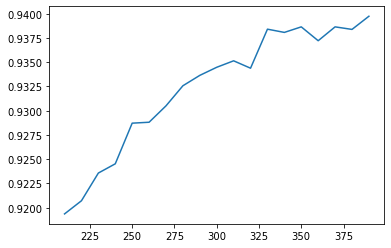

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
 
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

In [83]:
chivalue, pvalues_chi = chi2(X_fsvar,y)

In [84]:
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [85]:
pvalues_chi 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [86]:
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
 
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

In [87]:
from sklearn.feature_selection import f_classif
 
F, pvalues_f = f_classif(X_fsvar,y)

In [88]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [89]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [90]:
 
k = F.shape[0] - (pvalues_f > 0.05).sum()
 
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

In [91]:
from sklearn.feature_selection import mutual_info_classif as MIC
 
result = MIC(X_fsvar,y)
 
k = result.shape[0] - sum(result <= 0)
 
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

In [92]:
from sklearn.feature_selection import SelectFromModel         # 导入特征选择中的嵌入法所需要的模块
from sklearn.ensemble import RandomForestClassifier as RFC
 
RFC_ = RFC(n_estimators =10,random_state=0)
 
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
 
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [93]:
X_embedded.shape

(42000, 47)

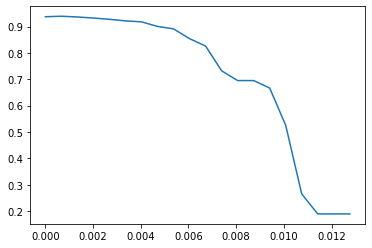

In [94]:
 
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值
 
import numpy as np
import matplotlib.pyplot as plt
 
RFC_.fit(X,y).feature_importances_
 
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
 
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [95]:
X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y)

In [96]:
X_embedded.shape

(42000, 324)

In [97]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9391190476190475

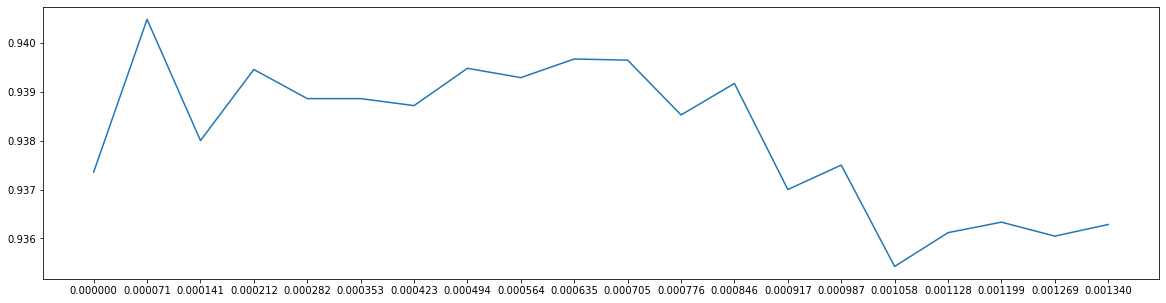

In [98]:
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [99]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)        # 特征选择中的嵌入法

In [100]:
X_embedded.shape

(42000, 340)

In [101]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9392857142857144

In [102]:
#我们可能已经找到了现有模型下的最佳结果，如果我们调整一下随机森林的参数呢？
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.9634285714285715

In [103]:
from sklearn.feature_selection import RFE             # 导入包装法所需要的模块
RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

In [104]:
selector.support_.sum()#340

340

In [105]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [106]:
X_wrapper = selector.transform(X)      # 特征选择中的包装法
 
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9379761904761905

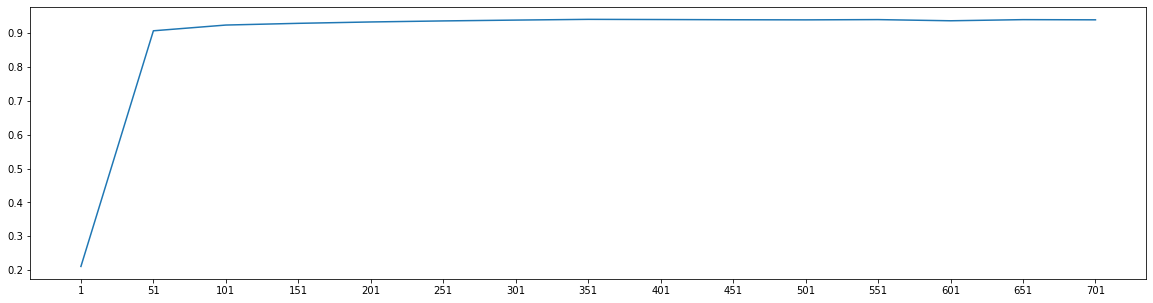

In [107]:
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()